# Scrabble Player Rating

https://www.kaggle.com/competitions/scrabble-player-rating/

## Dataset Description

The dataset includes information about ~73,000 Scrabble games played by three bots on Woogles.io: BetterBot (beginner), STEEBot (intermediate), and HastyBot (advanced). The games are between the bots and their opponents who are regular registered users. You are using metadata about the games as well as turns in each game (i.e., players' racks and where and what they played, AKA gameplay) to predict the rating of the human opponents in the test set (test.csv). You will train your model on gameplay data from one set of human opponents to make predictions about a different set of human opponents in the test set.

There is metadata for each game (games.csv), gameplay data about turns played by each player in each game (turns.csv), and final scores and ratings from BEFORE a given game was played for each player in each game (train.csv and test.csv).

Here is an example of a game played on woogles.io: https://woogles.io/game/icNJtmxy. Use the "Examine" button to replay the game turn-by-turn.

### Files
- `games.csv` - metadata about games (e.g., who went first, time controls)
- `turns.csv` - all turns from start to finish of each game
- `train.csv` - final scores and ratings for each player in each game; ratings for each player are as of BEFORE the game - was played
- `test.csv` - final scores and ratings for each player in each game; ratings for each player are as of BEFORE the game was played
- `sample_submission.csv` - a sample submission file in the correct format

### turns.csv
`turns.csv` contains full data for every turn for each game.

- **game_id** Unique id for the game
- **turn_number** The turn number in the game
- **nickname** Player's username on woogles.io
- **rack** Player's current rack
- **location** Where the player places their turn on the board (NA for games in the test set or if the player didn't make a play, e.g., if they exchanged)
- **move** Tiles the player laid (NA for games in the test set; "--" if the turn_type was "Pass"; "(challenge)" if the turn_type was "Challenge"; "-" plus tiles exchanged if the turn_type was "Exchange"; at the end of the game, remaining tiles in a player's rack are in parentheses)
- **points** Points the player earned (or lost) in their turn
- **score** Player's total score at the time of the turn
- **turn_type** Type of turn played ("Play", "Exchange", "Pass", "Six-Zero Rule" (i.e., a game that ends when players pass 3 turns in a row each), "Challenge")

### games.csv

- **game_id** Unique id for the game
- **first** Which player went first
- **time_control_name** Name of time control used ("regular", "rapid", or "blitz")
- **game_end_reason** How the game ended
- **winner** Who won the game
- **created_at** When the game was created
- **lexicon** English lexicon used in the game ("CSW19", "NWL20", "CSW21")
- **initial_time_seconds** Time limit each player has in the game (defines the time control name)
- **increment_seconds** Time increment each player gets each time they play a turn
- **rating_mode** Whether the game counts towards player ratings or not ("RATED", "CASUAL")
- **max_overtime_minutes** How far past the initial time limit players can go before they timeout
- **game_duration_seconds** How long the game lasted

### test.csv and train.csv
There's score and rating data about 1031 players in `train.csv` and 443 players in `test.csv`. Except for the three bots, no players are in both `train.csv` and `test.csv`. Ratings for the players are from BEFORE the game was played. Your task is to predict what the rating of the human player was in `test.csv` BEFORE the given game was played.

- **game_id** Unique id for the game
- **nickname** Player's username on woogles.io
- **score** Final score for each player for each game.
- **rating** Player's rating on woogles.io BEFORE the game was played; ratings are per Lexicon / time control name (AKA game variant). In test.csv, ratings are NA for player games; this is what you are predicting.

In [57]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [60]:
# show filenames; csv are stored in "data" folder
for dirname, _,filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# read in data
sample_sub = pd.read_csv('data/sample_submission.csv')
games = pd.read_csv('data/games.csv')
turns = pd.read_csv('data/turns.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

display(sample_sub.head())
display(games.head())
display(turns.head())
display(train.head())
display(test.head())

data/test.csv
data/turns.csv
data/games.csv
data/train.csv
data/sample_submission.csv


,game_id,rating
0,2,1790.322674
1,7,1790.322674
2,11,1790.322674
3,14,1790.322674
4,27,1790.322674


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


# Exploratory Data Analysis

In [61]:
# seperate humans and bots and merge dataframes
bot_names = ['BetterBot', 'STEEBot', 'HastyBot']
bots = train[train.nickname.isin(bot_names)].copy()
humans = train[~train.nickname.isin(bot_names)]

# rename bot columns 
bots.rename(columns={'nickname': 'bot', 'score': 'bot_score', 'rating': 'bot_rating'}, inplace=True)

# merge on game_id
train_merged = humans.merge(bots, on='game_id')
train_merged.head()

,game_id,nickname,score,rating,bot,bot_score,bot_rating
0,1,stevy,429,1500,BetterBot,335,1637
1,3,davidavid,440,1811,BetterBot,318,2071
2,4,Inandoutworker,119,1473,BetterBot,478,1936
3,5,stevy,325,1500,STEEBot,427,1844
4,6,HivinD,378,2029,STEEBot,427,2143


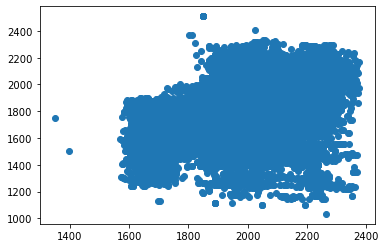

In [6]:
plt.scatter(np.array(train_merged.bot_rating), np.array(train_merged.rating))

In [7]:
filtered = train_merged[train_merged.nickname == 'HivinD']
# plt.figure(figsize=(20, 10))
# plt.plot(range(592), filtered.rating)

filtered.merge(games, on='game_id').head(10)

,game_id,nickname,score,rating,bot,bot_score,bot_rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,6,HivinD,378,2029,STEEBot,427,2143,HivinD,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541
1,19,HivinD,380,2151,STEEBot,471,2259,HivinD,regular,STANDARD,0,2022-09-20 09:09:39,CSW21,900,0,RATED,1,278.572545
2,26,HivinD,372,2086,STEEBot,427,2096,HivinD,regular,STANDARD,0,2022-08-11 08:22:48,CSW21,900,0,RATED,1,712.019593
3,210,HivinD,369,2072,STEEBot,446,2102,HivinD,regular,STANDARD,0,2022-09-17 11:46:04,CSW21,900,0,RATED,1,383.269923
4,666,HivinD,421,2016,BetterBot,319,1926,HivinD,regular,STANDARD,1,2022-08-21 15:11:09,CSW21,900,0,RATED,1,360.889033
5,1084,HivinD,500,2095,STEEBot,372,2169,HivinD,regular,STANDARD,1,2022-09-10 04:31:01,CSW21,900,0,RATED,1,253.895098
6,1321,HivinD,410,2131,STEEBot,478,2188,STEEBot,regular,STANDARD,0,2022-09-01 18:46:31,CSW21,900,0,RATED,1,440.277582
7,1410,HivinD,415,2139,STEEBot,446,2103,HivinD,regular,STANDARD,0,2022-08-25 16:38:02,CSW21,900,0,RATED,1,364.528859
8,1518,HivinD,475,2009,STEEBot,475,2152,STEEBot,regular,STANDARD,-1,2022-08-13 05:32:30,CSW21,900,0,RATED,1,182.705356
9,1552,HivinD,276,2048,STEEBot,618,2182,STEEBot,regular,STANDARD,0,2022-09-21 16:23:38,CSW21,900,0,RATED,1,144.095946


### combine games on mini_train

In [8]:
mini_train_merged = train_merged[:10]
mini_train_merged = mini_train_merged.merge(games, on='game_id')

# drop useless columns
drop_columns = ['initial_time_seconds', 'increment_seconds', 'max_overtime_minutes', 'game_duration_seconds', 
                'created_at', 'lexicon', 'game_end_reason']
mini_train_merged.drop(drop_columns, axis=1, inplace=True)

mini_train_merged.head()

,game_id,nickname,score,rating,bot,bot_score,bot_rating,first,time_control_name,winner,rating_mode
0,1,stevy,429,1500,BetterBot,335,1637,BetterBot,regular,1,CASUAL
1,3,davidavid,440,1811,BetterBot,318,2071,BetterBot,regular,1,RATED
2,4,Inandoutworker,119,1473,BetterBot,478,1936,BetterBot,regular,0,CASUAL
3,5,stevy,325,1500,STEEBot,427,1844,STEEBot,regular,0,CASUAL
4,6,HivinD,378,2029,STEEBot,427,2143,HivinD,regular,0,RATED


In [9]:
games.game_end_reason.value_counts()

STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: game_end_reason, dtype: int64

In `games.csv`, the values to the winner column are: 1 (if player wins) or 0 (if the bot wins)


`turns[turns.game_id == 1].tail()`

In [10]:
# winner = 1
# # turns[turns.game_id == 1].tail()
# winner = 0
# # turns[turns.game_id == 72772].tail()

In [14]:
test[test.nickname == 'Supteer']

,game_id,nickname,score,rating
0,2,Super,488,NaN
13,32,Super,420,NaN
377,544,Super,345,NaN
1883,3038,Super,379,NaN
2015,3268,Super,346,NaN
...,...,...,...,...
42564,69304,Super,281,NaN
43304,70602,Super,333,NaN
43827,71424,Super,433,NaN
44079,71791,Super,446,NaN


### EDA Findings

- test/train data is split by nicknames
- test nicknames do appear in both games and turns
- probably need to use time-series model (LSTM, RNN, Transformer?)

Interesting findings 
- rank shows rank at the beginning of the game. So, next time player appears in the dataset, sometimes their rank goes up even though they lost their previous game. This could be attributed to how all the games between a players last and next game caused a shift in the leaderboard, making a player's rank go up regardless of their inactivity or loss. 

# Data Preprocessing

# Model Building

In [41]:
import numpy as np
import tensorflow as tf
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from scipy import stats

from tensorflow import keras
from tensorflow.keras import layers

## Baseline Model

Features used: bot type, user rank, player score, bot score (train_merged table)

In [77]:
# data preprocessing

# seperate humans and bots and merge dataframes
bot_names = ['BetterBot', 'STEEBot', 'HastyBot']
bots = train[train.nickname.isin(bot_names)].copy()
humans = train[~train.nickname.isin(bot_names)]

# rename bot columns 
bots.rename(columns={'nickname': 'bot', 'score': 'bot_score', 'rating': 'bot_rating'}, inplace=True)

train_merged = humans.merge(bots, on='game_id')

#one hot encode bot name
one_hot = pd.get_dummies(train_merged["bot"])
encode_bot = train_merged
encode_bot = encode_bot.drop(["game_id", "nickname", "bot"], axis=1)
encode_bot = encode_bot.join(one_hot)

y = encode_bot["rating"]
x = encode_bot.drop("rating", axis=1)

display(x.head())
display(y.head())
print(x.shape, y.shape)

,score,bot_score,bot_rating,BetterBot,HastyBot,STEEBot
0,429,335,1637,1,0,0
1,440,318,2071,1,0,0
2,119,478,1936,1,0,0
3,325,427,1844,0,0,1
4,378,427,2143,0,0,1


0    1500
1    1811
2    1473
3    1500
4    2029
Name: rating, dtype: int64

(50410, 6) (50410,)


In [68]:
for model in [Lasso() LinearRegression(), DecisionTreeRegressor(), Ridge(), Lasso(), GradientBoostingRegressor(), 
              MLPRegressor(), SVR()]:

    val_rmse_scores = []
    val_mae_scores = []
    # add r2 if you want later

    kf = KFold(n_splits=5)

    for train_index, val_index in kf.split(x): # n-fold times 
        X_train, X_test = x.iloc[train_index], x.iloc[val_index]
        y_train, y_test = y.iloc[train_index], y.iloc[val_index]


        regr = model
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)

        val_rmse = mean_squared_error(y_test, y_pred) ** 0.5
        val_mae = mean_absolute_error(y_test, y_pred)
        val_rmse_scores.append(val_rmse)
        val_mae_scores.append(val_mae)

    print(str(model))
    print("Root mean squared error: %.2f" % np.mean(val_rmse_scores))
    print("Mean absolute error: %.2f" % np.mean(val_mae_scores))
    print(f'| {str(model)} | %.2f | %.2f |'% (rmse, mae))
    print()

Lasso()
Root mean squared error: 141.99
Mean absolute error: 104.67
| Lasso() | 170.48 | 123.64 |



### Baseline model summary table 

| Model | RMSE | MAE |
| ----------- | ----------- | ----------- |
| Linear Regression | 150.51 | 112.55 |
| Decision Tree | 204.10 | 143.47 |
| Ridge | 150.51 | 112.55|
| Lasso | 170.48 | 123.64 |
| SVR | 161.43 | 116.81 |
| Random Forest | 149.23 | 106.13 |
| Gradient Boosting | 142.21 | 101.48 |
| Multi-layer perceptron | 147.04 | 109.20 |



In [44]:
# check how much each variable affects result

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 1.340e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:05:00   Log-Likelihood:            -3.2428e+05
No. Observations:               50410   AIC:                         6.486e+05
Df Residuals:                   50404   BIC:                         6.486e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.3903      6.357     -8.398      0.0

## Bigger Model

Ideas: Variables/features to add into modeling input
- player's previous rating
- rating of players in the previous n games 
- player's board in the turns.csv

Features actually used: 'score', 'bot_score', 'bot_rating', 'bot_type',
       'first', 'winner', 'initial_time_seconds', 'increment_seconds',
       'max_overtime_minutes', 'game_duration_seconds', 'rating_mode', 'game_end_reason',
       'lexicon', 'game_end_reason', 'rating_mode', 'user_freq'

In [96]:
# seperate humans and bots and merge dataframes
bot_names = ['BetterBot', 'STEEBot', 'HastyBot']
bots = train[train.nickname.isin(bot_names)].copy()
humans = train[~train.nickname.isin(bot_names)]

# rename bot columns 
bots.rename(columns={'nickname': 'bot', 'score': 'bot_score', 'rating': 'bot_rating'}, inplace=True)

# merge on game_id
train_merged = humans.merge(bots, on='game_id')



# one hot encoding bot type 
one_hot = pd.get_dummies(train_merged["bot"])
train_games_merged = train_merged
train_games_merged = train_games_merged.drop(["bot"], axis=1)
train_games_merged = train_games_merged.join(one_hot)

# merging train data and games data
train_games_merged = train_games_merged.merge(games, how='left', on='game_id')
train_games_merged.head()

# changing "first" column to be 0=bot 1=player
train_games_merged.loc[~train_games_merged["first"].isin(bot_names), "first"] = 1
train_games_merged.loc[train_games_merged["first"].isin(bot_names), "first"] = 0
train_games_merged["first"] = train_games_merged["first"].astype(int)

# one hot encode remaining categorical data
col_one_hot = ["time_control_name", "game_end_reason", "lexicon", "rating_mode"]

for x in col_one_hot:
    one_hot = pd.get_dummies(train_games_merged[x])
    train_games_merged = train_games_merged.drop([x], axis=1)
    train_games_merged = train_games_merged.join(one_hot)
    
# add user frequency column 
train_games_merged["user_freq"] = train_games_merged.groupby("nickname")["nickname"].transform("count")

y = train_games_merged["rating"]
x = train_games_merged.drop(["rating", "nickname", "created_at", "game_id"], axis=1)

display(x.head())
display(y.head())
print(x.shape, y.shape)

,score,bot_score,bot_rating,BetterBot,HastyBot,STEEBot,first,winner,initial_time_seconds,increment_seconds,...,RESIGNED,STANDARD,TIME,CSW21,ECWL,NSWL20,NWL20,CASUAL,RATED,user_freq
0,429,335,1637,1,0,0,0,1,1200,0,...,0,1,0,0,0,0,1,1,0,410
1,440,318,2071,1,0,0,0,1,900,0,...,0,1,0,1,0,0,0,0,1,254
2,119,478,1936,1,0,0,0,0,3600,0,...,1,0,0,1,0,0,0,1,0,205
3,325,427,1844,0,0,1,0,0,1200,0,...,0,1,0,0,0,0,1,1,0,410
4,378,427,2143,0,0,1,1,0,900,0,...,0,1,0,1,0,0,0,0,1,592


0    1500
1    1811
2    1473
3    1500
4    2029
Name: rating, dtype: int64

(50410, 27) (50410,)


In [76]:
# check how much each variable affects result
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3781.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:59:38   Log-Likelihood:            -3.2102e+05
No. Observations:               50410   AIC:                         6.421e+05
Df Residuals:                   50387   BIC:                         6.423e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   274.90

In [67]:
for model in [GradientBoostingRegressor(), RandomForestRegressor(), LinearRegression(), DecisionTreeRegressor(), Ridge(), Lasso(),
              MLPRegressor(), SVR()]:

    val_rmse_scores = []
    val_mae_scores = []
    # add r2 if you want later

    kf = KFold(n_splits=5)

    for train_index, val_index in kf.split(x): # n-fold times 
        X_train, X_test = x.iloc[train_index], x.iloc[val_index]
        y_train, y_test = y.iloc[train_index], y.iloc[val_index]


        regr = model
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)

        val_rmse = mean_squared_error(y_test, y_pred) ** 0.5
        val_mae = mean_absolute_error(y_test, y_pred)
        val_rmse_scores.append(val_rmse)
        val_mae_scores.append(val_mae)

    print(str(model))
    print("Root mean squared error: %.2f" % np.mean(val_rmse_scores))
    print("Mean absolute error: %.2f" % np.mean(val_mae_scores))
    rmse = np.mean(val_rmse_scores)
    mae = np.mean(val_mae_scores)
    print(f'| {str(model)} | %.2f | %.2f |'% (rmse, mae))
    print()

GradientBoostingRegressor()
Root mean squared error: 109.85
Mean absolute error: 76.39
| GradientBoostingRegressor() | 109.85 | 76.39 |

RandomForestRegressor()
Root mean squared error: 68.64
Mean absolute error: 37.69
| RandomForestRegressor() | 68.64 | 37.69 |

LinearRegression()
Root mean squared error: 141.15
Mean absolute error: 103.82
| LinearRegression() | 141.15 | 103.82 |

DecisionTreeRegressor()
Root mean squared error: 95.22
Mean absolute error: 47.17
| DecisionTreeRegressor() | 95.22 | 47.17 |

Ridge()
Root mean squared error: 141.15
Mean absolute error: 103.82
| Ridge() | 141.15 | 103.82 |

Lasso()
Root mean squared error: 141.99
Mean absolute error: 104.67
| Lasso() | 141.99 | 104.67 |



C:\Users\shani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()
Root mean squared error: 121.65
Mean absolute error: 87.69
| MLPRegressor() | 121.65 | 87.69 |

SVR()
Root mean squared error: 170.48
Mean absolute error: 123.64
| SVR() | 170.48 | 123.64 |



###  Bigger model summary table

| Model | BL RMSE | BL MAE | RMSE | MAE |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Linear Regression | 150.51 | 112.55 | 141.15 | 103.82 |
| Decision Tree | 204.10 | 143.47 | 95.22 | 47.17 |
| Ridge | 150.51 | 112.55| 141.15 | 103.82 |
| Lasso() | 170.48 | 123.64 | 141.99 | 104.67 |
| SVR | 161.43 | 116.81 | 170.48 | 123.64 |
| Random Forest | 149.23 | 106.13 | 68.64 | 37.69 |
| Gradient Boosting | 142.21 | 101.48 | 109.85 | 76.39 |
| Multi-layer perceptron | 147.04 | 109.20 | 121.65 | 87.69 |



## Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

#create model
model = Sequential()

#add model layers
model.add(Dense(64))
model.add(Dense(1))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# #train the model
# # model.fit(mini_train_data, mini_train_labels, validation_data=(X_test, y_test), epochs=3)
# BATCH_SIZE = 5
# train_data = mini_train_data.batch(BATCH_SIZE)

kf = KFold(n_splits=5)

val_rmse_scores = []
val_mae_scores = []

for train_index, val_index in kf.split(x): # n-fold times 
    X_train, X_test = x.iloc[train_index], x.iloc[val_index]
    y_train, y_test = y.iloc[train_index], y.iloc[val_index]

    regr = model
    history = model.fit(X_train, y_train, epochs=10)
    y_pred = regr.predict(X_test)

    val_rmse = mean_squared_error(y_test, y_pred) ** 0.5
    val_mae = mean_absolute_error(y_test, y_pred)
    val_rmse_scores.append(val_rmse)
    val_mae_scores.append(val_mae)
    
print("Root mean squared error: %.2f" % np.mean(val_rmse_scores))
print("Mean absolute error: %.2f" % np.mean(val_mae_scores))
print(f'| {str(model)} | %.2f | %.2f |'% (rmse, mae))
print()
        
plt.plot(history.history['rmse'], label='train')
plt.plot(history.history['val_rmse'], label='val')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend()

# Generate predictions (using best model)

best model: random forest

train rows: 100820

In [145]:
# data preprocessing

# concatenate test data under train data
train_test_concat = pd.concat([train, test])

# seperate humans and bots and merge dataframes
bot_names = ['BetterBot', 'STEEBot', 'HastyBot']
bots = train_test_concat[train_test_concat.nickname.isin(bot_names)].copy()
humans = train_test_concat[~train_test_concat.nickname.isin(bot_names)]

bots.rename(columns={'nickname': 'bot', 'score': 'bot_score', 'rating': 'bot_rating'}, inplace=True)

# merge on game_id
concat_merged = humans.merge(bots, on='game_id')

# one hot encoding bot type 
one_hot = pd.get_dummies(concat_merged["bot"])
concat_games_merged = concat_merged.drop(["bot"], axis=1)
concat_games_merged = concat_games_merged.join(one_hot)

# merging train data and games data
concat_games_merged = concat_games_merged.merge(games, how='left', on='game_id')
concat_games_merged.head()

# changing "first" column to be 0=bot 1=player
concat_games_merged.loc[~concat_games_merged["first"].isin(bot_names), "first"] = 1
concat_games_merged.loc[concat_games_merged["first"].isin(bot_names), "first"] = 0
concat_games_merged["first"] = concat_games_merged["first"].astype(int)

# one hot encode remaining categorical data
col_one_hot = ["time_control_name", "game_end_reason", "lexicon", "rating_mode"]

for col in col_one_hot:
    one_hot = pd.get_dummies(concat_games_merged[col])
    concat_games_merged = concat_games_merged.drop([col], axis=1)
    concat_games_merged = concat_games_merged.join(one_hot)
    
# add user frequency column 
concat_games_merged["user_freq"] = concat_games_merged.groupby("nickname")["nickname"].transform("count")

# display('train', concat_games_merged.head())
# display('test', concat_games_merged.iloc[50410:, :].head())

y = concat_games_merged["rating"]
X = concat_games_merged.drop(["rating", "nickname", "created_at", "game_id"], axis=1)

train_data = concat_games_merged.iloc[:50410, :]
train_y = train_data["rating"]
train_X = train_data.drop(["rating", "nickname", "created_at", "game_id"], axis=1)

test_data = concat_games_merged.iloc[50410:, :]
test_y = test_data["rating"]
test_X = test_data.drop(["rating", "nickname", "created_at", "game_id"], axis=1)

print('Data Shapes:\n')
print(f'train data {train_data.shape} \ntrain_X {train_X.shape} \ntrain_y {train_y.shape}')
print(f'\n\ntest data {test_data.shape} \ntest_X {test_X.shape} \ntest_y {test_y.shape}')

Data Shapes:

train data (50410, 31) 
train_X (50410, 27) 
train_y (50410,)


test data (22363, 31) 
test_X (22363, 27) 
test_y (22363,)


In [146]:
# validate that all train rows have ratings
print(train_data.rating.isna().sum())

# validate that all test rows have NO ratings
print(test_data.rating.isna().sum())

0
22363


In [148]:
# fit model
regr = RandomForestRegressor()
regr.fit(train_X, train_y)

RandomForestRegressor()

In [160]:
# generate predictions on test set
test_pred = regr.predict(test_X)
test_pred

array([2013.52, 1999.04, 1578.39, ..., 1710.59, 2059.94, 2007.41])

In [159]:
output = test_data[['game_id']].copy()
output['rating'] = test_pred

,game_id,rating
50410,2,2013.52
50411,7,1999.04
50412,11,1578.39
50413,14,2086.61
50414,27,2083.60
...,...,...
72768,72760,1944.64
72769,72761,2026.31
72770,72762,1710.59
72771,72768,2059.94


In [ ]:
output.to_csv('output.csv')